In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Mengunduh data Bitcoin
symbol = "XRP-USD"
data = yf.download(tickers=symbol, interval="5d", period="max")

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Menghitung Moving Average (MA)
data['MA_3'] = data['Close'].rolling(window=3).mean()  # 3-day moving average
data['MA_5'] = data['Close'].rolling(window=5).mean()  # 5-day moving average
data['MA_30'] = data['Close'].rolling(window=5).mean()  # 30-day moving average

In [ ]:
# Menghitung Relative Strength Index (RSI)
def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

data['RSI'] = calculate_rsi(data, window=7)  # Menggunakan periode RSI 7

Price      Adj Close     Close      High       Low      Open       Volume  \
Ticker       XRP-USD   XRP-USD   XRP-USD   XRP-USD   XRP-USD      XRP-USD   
Date                                                                        
2017-11-09  0.217488  0.217488  0.221791  0.214866  0.217911    147916992   
2017-11-14  0.209825  0.209825  0.213693  0.203679  0.203679    127361000   
2017-11-19  0.231016  0.231016  0.236231  0.226037  0.228140    193808000   
2017-11-24  0.244642  0.244642  0.245388  0.238421  0.242851    211486000   
2017-11-29  0.243064  0.243064  0.297867  0.239409  0.297867    541177984   
...              ...       ...       ...       ...       ...          ...   
2024-12-02  2.713805  2.713805  2.849681  2.243893  2.320742  51723383809   
2024-12-07  2.616624  2.616624  2.617264  2.396322  2.424744  12359080774   
2024-12-12  2.342770  2.342770  2.481633  2.316994  2.400055  10907030447   
2024-12-17  2.565190  2.565190  2.717675  2.445717  2.488598  17019845093   

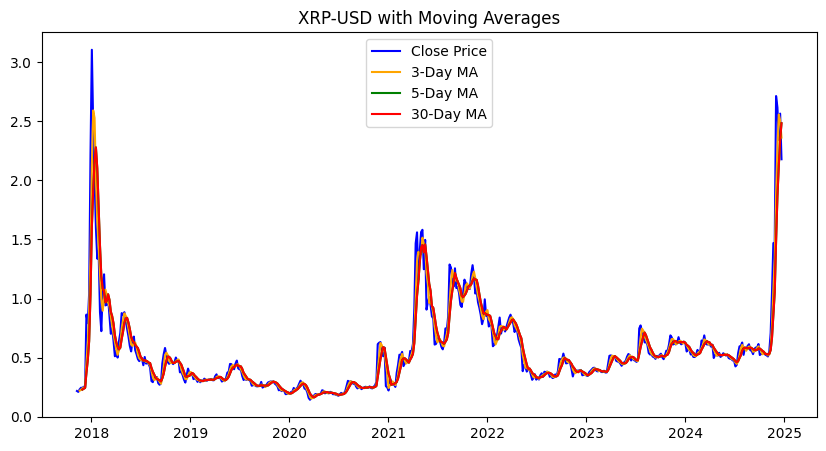

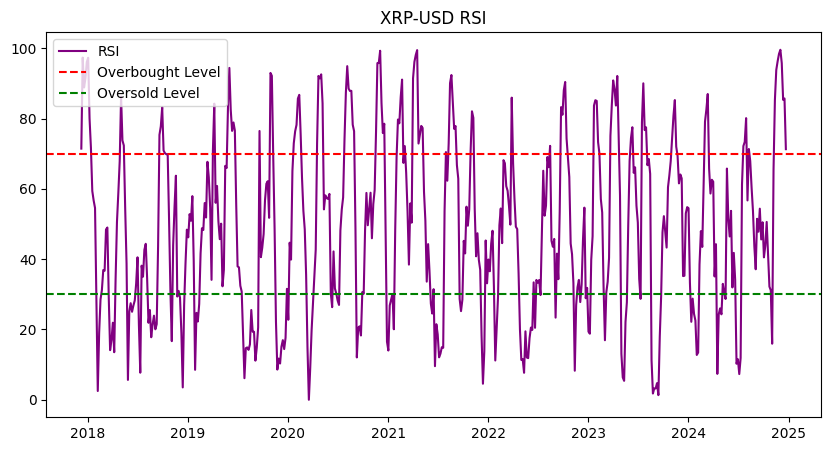

In [ ]:
# Menampilkan data dengan indikator teknikal
print(data)

# Plotting Moving Average
plt.figure(figsize=(10, 5))
plt.plot(data['Close'], label="Close Price", color='blue')
plt.plot(data['MA_3'], label="3-Day MA", color='orange')
plt.plot(data['MA_5'], label="5-Day MA", color='green')
plt.plot(data['MA_30'], label="30-Day MA", color='red')
plt.title("XRP-USD with Moving Averages")
plt.legend()
plt.show()

# Plotting RSI
plt.figure(figsize=(10, 5))
plt.plot(data['RSI'], label="RSI", color='purple')
plt.axhline(70, color='red', linestyle='--', label="Overbought Level")
plt.axhline(30, color='green', linestyle='--', label="Oversold Level")
plt.title("XRP-USD RSI")
plt.legend()
plt.show()

[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 0.0186
Epoch 2/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0046
Epoch 3/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0039
Epoch 4/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0034
Epoch 5/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0029
Epoch 6/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0027
Epoch 7/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0029
Epoch 8/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0025
Epoch 9/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0018
Epoch 10/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0017
Epoch 11/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0022
Epoch 12/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0019
Epoch 13/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0019
Epoch 14/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0018
Epoch 15/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0018
Epoc

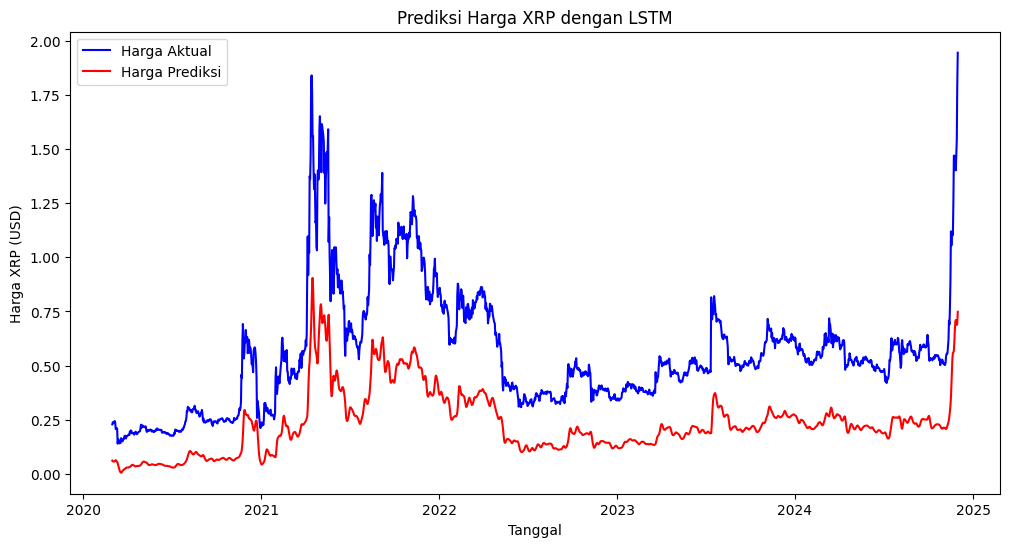

In [ ]:

# Import library yang dibutuhkan
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
import matplotlib.pyplot as plt

# Langkah 1: Ambil data historis XRP dari yfinance
# Gunakan simbol XRP-USD untuk Ripple dalam USD
xrp_data = yf.download('XRP-USD', start='2020-01-01', end='2024-12-01')

# Pilih hanya harga penutupan (Close)
closing_prices = xrp_data[['Close']]

# Langkah 2: Preprocessing data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(closing_prices)

# Membuat dataset untuk LSTM
def create_dataset(data, time_steps=60):
    X, y = [], []
    for i in range(time_steps, len(data)):
        X.append(data[i-time_steps:i, 0])  # 60 hari terakhir sebagai input
        y.append(data[i, 0])  # Hari berikutnya sebagai output
    return np.array(X), np.array(y)

time_steps = 60  # Jumlah hari untuk prediksi
X, y = create_dataset(scaled_data, time_steps)

# Reshape agar sesuai dengan input LSTM (samples, time_steps, features)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Langkah 3: Bangun model LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))  # Output harga

model.compile(optimizer='adam', loss='mean_squared_error')

# Langkah 4: Train model
history = model.fit(X, y, epochs=20, batch_size=32, verbose=1)

# Langkah 5: Prediksi data validasi
# Ambil data 60 hari terakhir untuk prediksi
test_data = scaled_data[-time_steps:]
test_data = test_data.reshape((1, test_data.shape[0], 1))

predicted_price = model.predict(test_data)
predicted_price = scaler.inverse_transform(predicted_price)

print(f"Harga XRP Prediksi: {predicted_price[0][0]} USD")

# Langkah 6: Visualisasi Hasil
# Plot harga aktual dan prediksi pada data pelatihan
plt.figure(figsize=(12, 6))
plt.plot(closing_prices.index[-len(y):], scaler.inverse_transform(y.reshape(-1, 1)), color='blue', label='Harga Aktual')
plt.plot(closing_prices.index[-len(y):], model.predict(X).reshape(-1, 1), color='red', label='Harga Prediksi')
plt.title('Prediksi Harga XRP dengan LSTM')
plt.xlabel('Tanggal')
plt.ylabel('Harga XRP (USD)')
plt.legend()
plt.show()

[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0274
Epoch 2/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0056
Epoch 3/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0042
Epoch 4/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0031
Epoch 5/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0028
Epoch 6/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0031
Epoch 7/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0026
Epoch 8/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0020
Epoch 9/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0027
Epoch 10/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0021
Epoch 11/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0027
Epoch 12/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0021
Epoch 13/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0018
Epoch 14/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0014
Epoch 15/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0022
Epoc

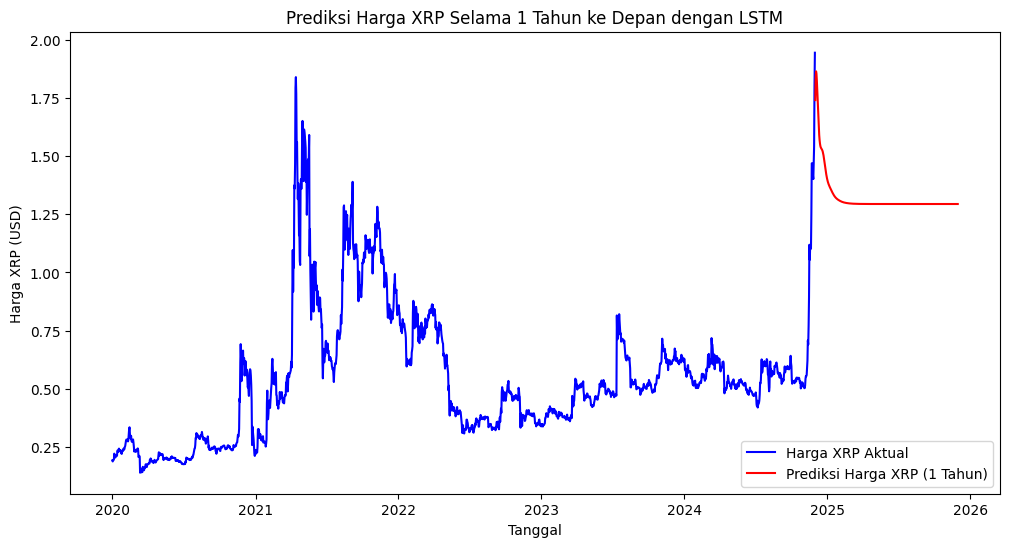

In [ ]:

# Import library yang dibutuhkan
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
import matplotlib.pyplot as plt

# Langkah 1: Ambil data historis XRP dari yfinance
# Gunakan simbol XRP-USD untuk Ripple dalam USD
xrp_data = yf.download('XRP-USD', start='2020-01-01', end='2024-12-01')

# Pilih hanya harga penutupan (Close)
closing_prices = xrp_data[['Close']]

# Langkah 2: Preprocessing data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(closing_prices)

# Membuat dataset untuk LSTM
def create_dataset(data, time_steps=60):
    X, y = [], []
    for i in range(time_steps, len(data)):
        X.append(data[i-time_steps:i, 0])  # 60 hari terakhir sebagai input
        y.append(data[i, 0])  # Hari berikutnya sebagai output
    return np.array(X), np.array(y)

time_steps = 60  # Jumlah hari untuk prediksi
X, y = create_dataset(scaled_data, time_steps)

# Reshape agar sesuai dengan input LSTM (samples, time_steps, features)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Langkah 3: Bangun model LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))  # Output harga

model.compile(optimizer='adam', loss='mean_squared_error')

# Langkah 4: Train model
history = model.fit(X, y, epochs=20, batch_size=32, verbose=1)

# Langkah 5: Prediksi harga selama 1 tahun ke depan
# Hitung jumlah hari dalam 1 tahun (365 hari)
days_in_year = 365

# Ambil data 60 hari terakhir untuk prediksi
last_60_days = scaled_data[-time_steps:]

# Membuat list untuk menyimpan hasil prediksi
predicted_prices = []

# Prediksi untuk setiap hari berikutnya selama 365 hari
for i in range(days_in_year):
    # Prediksi harga untuk hari ke-i
    input_data = last_60_days.reshape((1, last_60_days.shape[0], 1))
    predicted_price = model.predict(input_data)
    predicted_prices.append(predicted_price[0][0])

    # Perbarui data input untuk prediksi hari berikutnya
    last_60_days = np.append(last_60_days[1:], predicted_price, axis=0)

# Konversi prediksi harga ke bentuk yang bisa dipetakan ke skala asli (USD)
predicted_prices = scaler.inverse_transform(np.array(predicted_prices).reshape(-1, 1))

# Langkah 6: Visualisasi Hasil Prediksi
# Buat tanggal untuk prediksi 1 tahun ke depan
predicted_dates = pd.date_range(start=xrp_data.index[-1], periods=days_in_year+1, freq='D')[1:]

# Plot harga historis dan prediksi harga 1 tahun ke depan
plt.figure(figsize=(12, 6))
plt.plot(xrp_data.index, closing_prices, color='blue', label='Harga XRP Aktual')
plt.plot(predicted_dates, predicted_prices, color='red', label='Prediksi Harga XRP (1 Tahun)')
plt.title('Prediksi Harga XRP Selama 1 Tahun ke Depan dengan LSTM')
plt.xlabel('Tanggal')
plt.ylabel('Harga XRP (USD)')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━

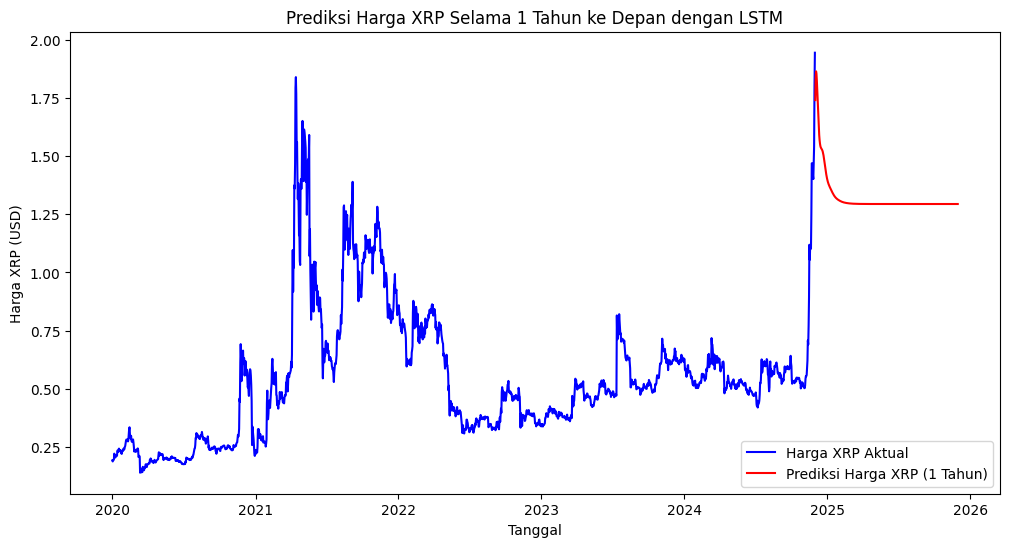

Mean Absolute Error (MAE): 0.7427041800871287
Root Mean Squared Error (RMSE): 0.7562303030710701


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

# Langkah 5: Prediksi harga selama 1 tahun ke depan
# Hitung jumlah hari dalam 1 tahun (365 hari)
days_in_year = 365

# Ambil data 60 hari terakhir untuk prediksi
last_60_days = scaled_data[-time_steps:]

# Membuat list untuk menyimpan hasil prediksi
predicted_prices = []

# Prediksi untuk setiap hari berikutnya selama 365 hari
for i in range(days_in_year):
    # Prediksi harga untuk hari ke-i
    input_data = last_60_days.reshape((1, last_60_days.shape[0], 1))
    predicted_price = model.predict(input_data)
    predicted_prices.append(predicted_price[0][0])

    # Perbarui data input untuk prediksi hari berikutnya
    last_60_days = np.append(last_60_days[1:], predicted_price, axis=0)

# Konversi prediksi harga ke bentuk yang bisa dipetakan ke skala asli (USD)
predicted_prices = scaler.inverse_transform(np.array(predicted_prices).reshape(-1, 1))

# Langkah 6: Visualisasi Hasil Prediksi
# Buat tanggal untuk prediksi 1 tahun ke depan
predicted_dates = pd.date_range(start=xrp_data.index[-1], periods=days_in_year+1, freq='D')[1:]

# Plot harga historis dan prediksi harga 1 tahun ke depan
plt.figure(figsize=(12, 6))
plt.plot(xrp_data.index, closing_prices, color='blue', label='Harga XRP Aktual')
plt.plot(predicted_dates, predicted_prices, color='red', label='Prediksi Harga XRP (1 Tahun)')
plt.title('Prediksi Harga XRP Selama 1 Tahun ke Depan dengan LSTM')
plt.xlabel('Tanggal')
plt.ylabel('Harga XRP (USD)')
plt.legend()
plt.show()

# **Evaluasi Keakuratan**
# Untuk perbandingan, kita butuh data aktual untuk periode prediksi (misalnya data yang benar-benar sudah terjadi untuk satu tahun ke depan)
# Misalnya jika Anda punya data untuk 1 tahun setelah data pelatihan, Anda bisa menggunakan itu untuk menghitung MAE, RMSE, dsb.

# Jika kita mengasumsikan bahwa prediksi adalah valid (misalnya Anda memiliki data sebenarnya untuk tahun mendatang),
# kita bisa mengukur MAE dan RMSE.
actual_prices = closing_prices[-days_in_year:].values  # Asumsi data aktual harga XRP di masa depan
mae = mean_absolute_error(actual_prices, predicted_prices)
rmse = math.sqrt(mean_squared_error(actual_prices, predicted_prices))

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')